In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Download required data
nltk.download(['punkt', 'stopwords'], quiet=True)

True

In [6]:
def find_top_five_words(text, include_stopwords=False, min_length=1):
    """Find the 5 most frequently occurring words in text"""
    
    print("EXPERIMENT 2: Top 5 Most Frequent Words")
    print("=" * 50)
    print(f"Input Text: {text[:100]}..." if len(text) > 100 else f"Input Text: {text}")
    print("=" * 50)
    
    # Step 1: Tokenization
    words = word_tokenize(text.lower())
    print(f"\n1. TOKENIZATION:")
    print(f"   Total tokens: {len(words)}")
    print(f"   Sample tokens: {words[:10]}")
    
    # Step 2: Filter alphabetic words
    alpha_words = [word for word in words if word.isalpha() and len(word) >= min_length]
    print(f"\n2. ALPHABETIC FILTERING:")
    print(f"   Alphabetic words: {len(alpha_words)}")
    
    # Step 3: Stopword handling
    stop_words = set(stopwords.words('english'))
    
    if include_stopwords:
        filtered_words = alpha_words
        print(f"\n3. WORD FILTERING: Including stopwords")
    else:
        filtered_words = [word for word in alpha_words if word not in stop_words]
        print(f"\n3. WORD FILTERING: Excluding stopwords")
        print(f"   Words after stopword removal: {len(filtered_words)}")
    
    # Step 4: Frequency counting
    word_freq = Counter(filtered_words)
    total_unique = len(word_freq)
    
    print(f"\n4. FREQUENCY ANALYSIS:")
    print(f"   Total unique words: {total_unique}")
    print(f"   Most common word occurs: {word_freq.most_common(1)[0][1]} times")
    
    # Step 5: Top 5 most frequent words
    top_five = word_freq.most_common(5)
    
    print(f"\n5. TOP 5 MOST FREQUENT WORDS:")
    print("-" * 30)
    for rank, (word, count) in enumerate(top_five, 1):
        percentage = (count / len(filtered_words)) * 100
        print(f"   {rank}. '{word}': {count} times ({percentage:.1f}%)")
    
    return top_five, word_freq


In [7]:
def compare_with_without_stopwords(text):
    """Compare frequency analysis with and without stopwords"""
    
    print(f"\nCOMPARISON: With vs Without Stopwords")
    print("=" * 50)
    
    # With stopwords
    print("WITH STOPWORDS:")
    top_five_with, freq_with = find_top_five_words(text, include_stopwords=True)
    
    print("\n" + "="*70)
    
    # Without stopwords  
    print("WITHOUT STOPWORDS:")
    top_five_without, freq_without = find_top_five_words(text, include_stopwords=False)
    
    # Side by side comparison
    print(f"\nSIDE-BY-SIDE COMPARISON:")
    print("-" * 50)
    print(f"{'Rank':<4} | {'With Stopwords':<20} | {'Without Stopwords':<20}")
    print("-" * 50)
    
    for i in range(5):
        with_word = f"{top_five_with[i][0]} ({top_five_with[i][1]})" if i < len(top_five_with) else "N/A"
        without_word = f"{top_five_without[i][0]} ({top_five_without[i][1]})" if i < len(top_five_without) else "N/A"
        print(f"{i+1:<4} | {with_word:<20} | {without_word:<20}")
    
    return top_five_with, top_five_without

In [8]:
def visualize_frequency(top_words, title="Top 5 Words Frequency"):
    """Create visualization of word frequency"""
    
    words = [word for word, count in top_words]
    counts = [count for word, count in top_words]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(words, counts, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                str(count), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [9]:
# Test with different text samples
sample_texts = {
    "Short Story": """
    The cat sat on the mat. The cat was very happy sitting on the comfortable mat. 
    The mat was warm and soft, perfect for the cat to rest.
    """,
    
    "News Article": """
    Climate change continues to affect global weather patterns. Scientists are studying 
    the impact of rising temperatures on ocean currents and wildlife populations. 
    Recent research shows significant changes in migration patterns of various species.
    """,
    
    "Technical Text": """
    Machine learning algorithms require large datasets for training. The quality of data 
    significantly impacts model performance. Data preprocessing and feature engineering 
    are crucial steps in the machine learning pipeline.
    """
}

Testing with Short Story:

COMPARISON: With vs Without Stopwords
WITH STOPWORDS:
EXPERIMENT 2: Top 5 Most Frequent Words
Input Text: 
    The cat sat on the mat. The cat was very happy sitting on the comfortable mat. 
    The mat was...

1. TOKENIZATION:
   Total tokens: 32
   Sample tokens: ['the', 'cat', 'sat', 'on', 'the', 'mat', '.', 'the', 'cat', 'was']

2. ALPHABETIC FILTERING:
   Alphabetic words: 28

3. WORD FILTERING: Including stopwords

4. FREQUENCY ANALYSIS:
   Total unique words: 17
   Most common word occurs: 6 times

5. TOP 5 MOST FREQUENT WORDS:
------------------------------
   1. 'the': 6 times (21.4%)
   2. 'cat': 3 times (10.7%)
   3. 'mat': 3 times (10.7%)
   4. 'on': 2 times (7.1%)
   5. 'was': 2 times (7.1%)

WITHOUT STOPWORDS:
EXPERIMENT 2: Top 5 Most Frequent Words
Input Text: 
    The cat sat on the mat. The cat was very happy sitting on the comfortable mat. 
    The mat was...

1. TOKENIZATION:
   Total tokens: 32
   Sample tokens: ['the', 'cat', 'sat', 'on',

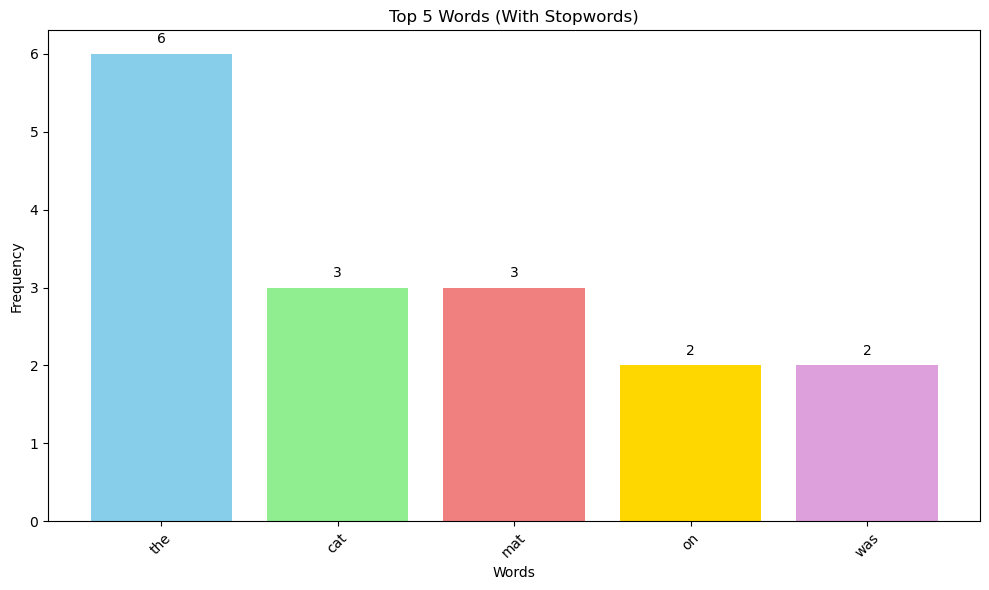

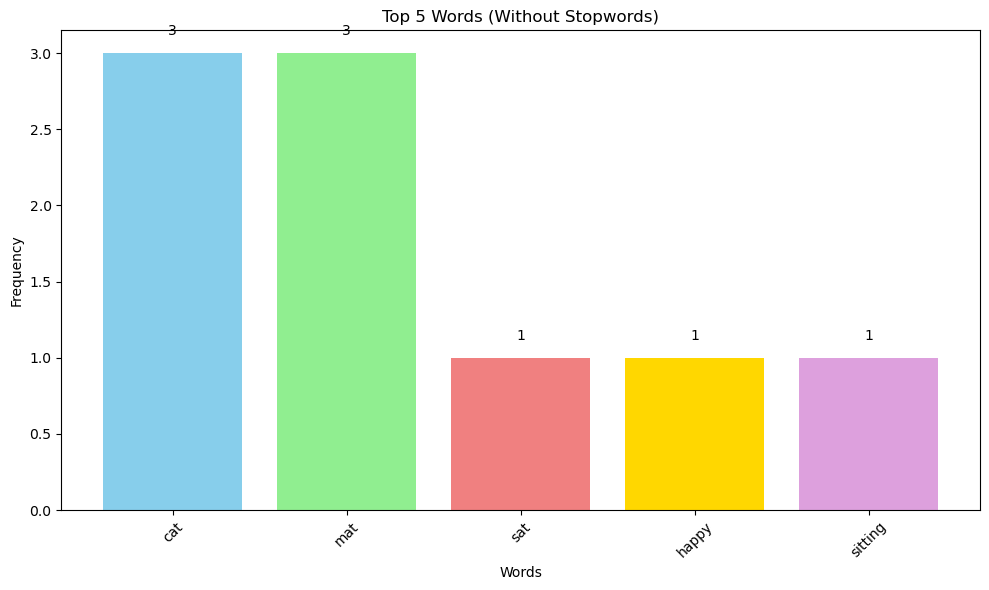

In [10]:
# Run experiment with sample text
selected_text = sample_texts["Short Story"]
print("Testing with Short Story:")
top_five_with, top_five_without = compare_with_without_stopwords(selected_text)

# Visualize results
visualize_frequency(top_five_with, "Top 5 Words (With Stopwords)")
visualize_frequency(top_five_without, "Top 5 Words (Without Stopwords)")

In [11]:
# Advanced analysis function
def advanced_frequency_analysis(text):
    """More detailed frequency analysis"""
    
    words = [word.lower() for word in word_tokenize(text) if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    content_words = [word for word in words if word not in stop_words]
    
    print(f"\nADVANCED FREQUENCY ANALYSIS:")
    print("=" * 40)
    print(f"Total words: {len(words)}")
    print(f"Unique words: {len(set(words))}")
    print(f"Content words: {len(content_words)}")
    print(f"Unique content words: {len(set(content_words))}")
    
    # Frequency distribution
    freq_dist = Counter(content_words)
    
    print(f"\nFREQUENCY DISTRIBUTION:")
    print(f"Words appearing once: {sum(1 for count in freq_dist.values() if count == 1)}")
    print(f"Words appearing 2+ times: {sum(1 for count in freq_dist.values() if count >= 2)}")
    print(f"Words appearing 3+ times: {sum(1 for count in freq_dist.values() if count >= 3)}")
    
    return freq_dist

In [12]:
# Quick function for any text
def quick_top_five(text):
    """Quick function to get top 5 words"""
    words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
    stop_words = set(stopwords.words('english'))
    filtered = [w for w in words if w not in stop_words]
    return Counter(filtered).most_common(5)
# Test all sample texts
print(f"\nQUICK ANALYSIS OF ALL SAMPLE TEXTS:")
print("=" * 50)
for name, text in sample_texts.items():
    print(f"\n{name.upper()}:")
    top_five = quick_top_five(text)
    for i, (word, count) in enumerate(top_five, 1):
        print(f"  {i}. '{word}': {count}")


QUICK ANALYSIS OF ALL SAMPLE TEXTS:

SHORT STORY:
  1. 'cat': 3
  2. 'mat': 3
  3. 'sat': 1
  4. 'happy': 1
  5. 'sitting': 1

NEWS ARTICLE:
  1. 'patterns': 2
  2. 'climate': 1
  3. 'change': 1
  4. 'continues': 1
  5. 'affect': 1

TECHNICAL TEXT:
  1. 'machine': 2
  2. 'learning': 2
  3. 'data': 2
  4. 'algorithms': 1
  5. 'require': 1
